<a href="https://colab.research.google.com/github/vanecornejo/Simulaci-n-I/blob/main/Flecha%20y%20cojinete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 5.4 Flecha y Cojinete**
**Una flecha será ensamblada en un cojinete como se muestra a continuación:**

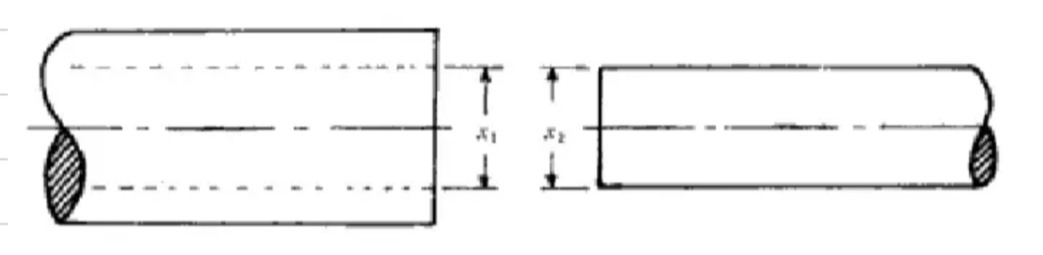
**Si $x_1$ sigue una distribución normal con media 1.5 y variancia 0.0016, y $x_2$ sigue esta misma distribución con media 1.48 y variancia 0.0009, determine:**

**a) La probabilidad de que haya interferencia.**

**b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de 0.01, con un nivel de seguridad del 95%.**



*Solución:*

Las dimensiones del diámetro de la flecha y del orificio del cojinete siguen distribuciones normales:

$ x_1 \sim N(1.5, 0.04^2) $ \\
$ x_2 \sim N(1.48, 0.03^2) $


### a) ¿Cuál es la probabilidad de que haya interferencia?
Condición de interferencia: $ x_2 ≥ x_1 $

Queremos calcular $ P(x_2 ≥ x_1) $

Dado que $x_1$ y $x_2$ son normales independientes, definimos una nueva variable:
$$ D = x_1 - x_2 ⇒ D \sim N(μ_D, σ^2_D) $$
Calculamos
*   La media: $ μ_D = μ_1 - μ_2 = 1.5-1.48 = 0.02 $
*   La varianza: $ σ^2_D = σ^2_1 - σ^2_2 = (0.04)^2 - (0.03)^2 = 0.0016-0.0009 = 0.0025 $
*   La desviación estándar: $ σ_D = \sqrt{0.0025} = 0.05 $

Entonces calculamos el estadístico Z:
$$ P(x_2 ≥ x_1) = P(D≤0) = P\left(Z ≤ \frac{0-0.02}{0.05} \right) = P(Z ≤ -0.4) $$
Buscando en la tabla de la normal estándar:
$$ P(Z \leq -0.4) \approx 0.3446 $$

Por lo tanto, la probabilidad de interferencia es aproximadamente **0.3446**.

### b) ¿Cuántas simulaciones son necesarias para estimar esa probabilidad con error menor a 0.01 y confianza del 95%?

Sabemos que la probabilidad estimada de $\hat{p}$ sigue una distribución binomial, aproximada por una distribución normal para $n$ grande, es decir,

$$ \hat{p} \sim N\left(p,\sqrt{\frac{p(1-p)}{n}}\right) $$

sustituyendo el valor de $p$ en el Error estándar:

E = $\sqrt{\frac{(0.3446)(0.6554)}{n}}=\sqrt{\frac{0.225845}{n}}$

Ahora, queremos estimar la probabilidad con error menor a 0.01 y con un nivel de confianza del 95%, por lo que usamos
$$ z_\frac{α}{2}=1.96 $$

Así,

$$ E=1.96⋅\sqrt{\frac{0.225845}{n}}\leq0.01 $$
$$ ⇒E=\sqrt{\frac{0.225845}{n}}\leq\frac{0.01}{1.96} $$
$$ ⇒E=\frac{0.225845}{n} \leq \left(\frac{0.01}{1.96}\right)^2≈0.00002603 $$
$$ ⇒E=n\geq\frac{0.225845}{0.00002603}≈8677.84 $$
$$ ⇒ n\geq8678 $$

Por lo tanto, se deben realizar al menos **8676 simulaciones** para estimar la probabilidad con un error máximo de ±0.01 al 95% de confianza.

In [38]:
# importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# Parámetros de las distribuciones
media1 = 1.5
desv1 = 0.04
media2 = 1.48
desv2 = 0.03

# Simulación de un experimento de n muestras
n = 8676 #usamos el número de simulaciones obtenidos en el análisis teórico
def experimento(n):
    exitos = 0
    for i in range(n):
        x1 = np.random.normal(media1, desv1)
        x2 = np.random.normal(media2, desv2)
        if x2 >= x1:
            exitos += 1
    return exitos / n

In [40]:
# Repetimos el experimento 1000 veces
m = 1000
def muestra(m, n):
    resultados = []
    for i in range(m):
        p = experimento(n)
        resultados.append(p)
    return resultados

In [41]:
# Ejecutamos la simulación
np.random.seed(42)
resultados = muestra(m, n)

# Imprimimos los valores estadísticos
media_estimada = np.mean(resultados)
desviacion_estimada = np.std(resultados)

print("Probabilidad promedio estimada:", media_estimada)
print("\nDesviación estándar de la estimación:", desviacion_estimada)

Probabilidad promedio estimada: 0.34465191332411244

Desviación estándar de la estimación: 0.004950584914609405


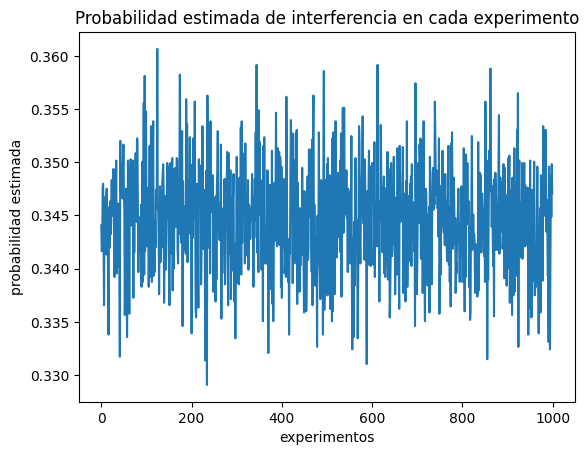

In [42]:
# Graficando los resultados
plt.plot(resultados)
plt.title("Probabilidad estimada de interferencia en cada experimento")
plt.xlabel("experimentos")
plt.ylabel("probabilidad estimada")
plt.show()

(array([ 1.,  0.,  0.,  3.,  2.,  4.,  3.,  8.,  2.,  6., 15., 11., 13.,
        22., 21., 23., 42., 25., 34., 32., 53., 47., 50., 40., 44., 61.,
        42., 65., 35., 50., 39., 33., 31., 37., 15., 18., 16., 17.,  9.,
         8.,  4.,  3.,  5.,  3.,  1.,  1.,  2.,  3.,  0.,  1.]),
 array([0.3290687 , 0.32970032, 0.33033195, 0.33096358, 0.33159521,
        0.33222683, 0.33285846, 0.33349009, 0.33412172, 0.33475334,
        0.33538497, 0.3360166 , 0.33664822, 0.33727985, 0.33791148,
        0.33854311, 0.33917473, 0.33980636, 0.34043799, 0.34106962,
        0.34170124, 0.34233287, 0.3429645 , 0.34359613, 0.34422775,
        0.34485938, 0.34549101, 0.34612264, 0.34675426, 0.34738589,
        0.34801752, 0.34864915, 0.34928077, 0.3499124 , 0.35054403,
        0.35117566, 0.35180728, 0.35243891, 0.35307054, 0.35370217,
        0.35433379, 0.35496542, 0.35559705, 0.35622868, 0.3568603 ,
        0.35749193, 0.35812356, 0.35875519, 0.35938681, 0.36001844,
        0.36065007]),
 <BarContainer

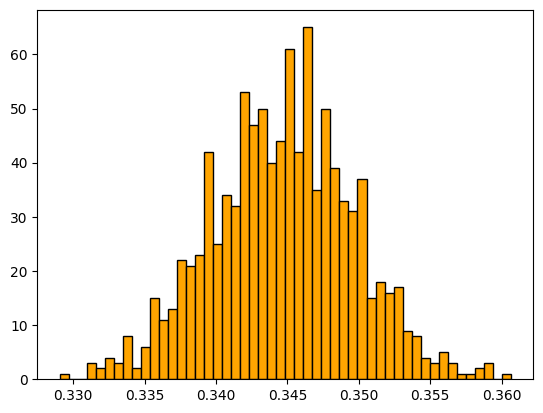

In [43]:
# Imprimimos el histograma
plt.hist(resultados, bins=50, color='orange', edgecolor='black')